# Regressión Logística

Vamos a plotear primero la función sigmoid. Como siempre importamos las librerías:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inlineb

Vamos ahora a crear la funcion y a crear el vector de entrada.

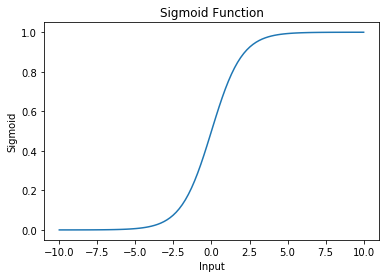

In [12]:
z = np.linspace(-10,10,100)
sigmoid = 1.0/(1+np.exp(-z))

plt.title("Sigmoid Function")
plt.plot(z,sigmoid)
plt.xlabel("Input")
plt.ylabel("Sigmoid")
plt.show()

Vamos a mostrar el **valor umbral**.

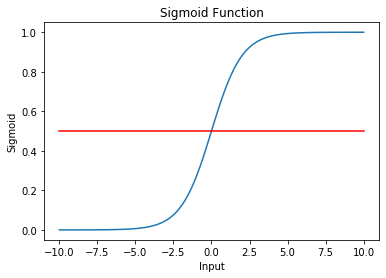

In [14]:
plt.title("Sigmoid Function")
plt.plot(z,sigmoid)
plt.plot(z,0.5*np.ones(100),color="red")
plt.xlabel("Input")
plt.ylabel("Sigmoid")
plt.show()

Vamos ahora a escribir la función que usaremos para predecir los valores de probabilidad de pertenecer a una clase:

In [22]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def predict(features,weights):
    z = np.dot(features,weights)
    return sigmoid(z)
    


[0.95257413 0.99752738]


In [25]:
features = [1,1,1]
weights = [1,1,1]
prediction = predict(features,weights)
print(prediction)

0.9525741268224334


Vamos ahora a ver la funcion de coste del regresor lineal, que durante el proceso de entreno usaremo el Gradient Descent para calcular el mínimo de la función.

In [26]:
def cost_function(features, labels, weights):

    observations = len(labels)

    predictions = predict(features, weights)

    #El error cuando la clase es 1
    class1_cost = -labels*np.log(predictions)

    #El error cuando la calse 0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Sumamos los costes
    cost = class1_cost - class2_cost

    #Calcular la media
    cost = cost.sum() / observations

    return cost

El Gradient Descent nos queda de la siguiente manera:

In [27]:
def update_weights(features, labels, weights, lr):
   
    N = len(features)

    # Hacemos primero las predicciones.
    predictions = predict(features, weights)

    # Calculamos el gradiente, teniendo en cuenta que hay que calcular la transpuesta de las features
    # para poder calcular el coste. de cada una de las variables por separado.
    gradient = np.dot(features.T,  predictions - labels)

    # Calculamos el coste medio
    gradient = gradient/N

    # Aplicamos el factor de aprendizaje
    gradient = gradient * lr

    # Ahora restamos el valor para encontrar el nuevo valor.
    weights -= gradient
    
    # Esta función la tendremos que iterar tantas veces sea necesario hasta que encontremos un coste 0, o un tiempo...
    return weights

Por último tenemos que calcular el valor umbral

In [28]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0
  
def classify(predictions):
  decision_boundary = np.vectorize(decision_boundary)
  return decision_boundary(predictions).flatten() 

Para poder entrenar esto, usaremos la siguiente función:

In [30]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        # Calcular el error para poder ver que está haciendo el algoritmo.
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Vamos mirando que va pasando con la evolución de la función de coste
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

## Iris dataset
Ahora vamos a ver un ejemplo real que ya comentamos un día, la predicción de que tipo de flor es apartir de un conjunto de caracteristicas. Usaremos a más la libreria de scikit para realizar el problema. 

El dataset de flores, Iris es un conjunto de datos multivariado introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936. Es el ejemplo clásico para problemas de clasificación. Consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros. 

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Cojamos ahora los datos que ya vienen con sklearn y mostremos los datos para entender que tenemos.

In [48]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vamos ahora a entrenar el regresor logístico tal y como ya hicimos con el regresor lineal (Scickit usa la misma API para todas las funciones, cosa muy útil). Primero tenemos que prepara el dataset para el entreno.

In [49]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


Como siempre hacemos, vamos a *plotear* estos datos:

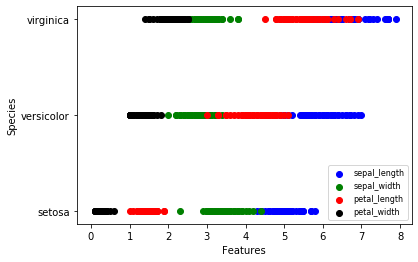

In [52]:
plt.xlabel('Caracteristicas)
plt.ylabel('Especies')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

Vamos ahora a separar el dataset para tener un training set y un test set:

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos ahora a crear y a entrenar un modelo de regresión logística:

In [58]:
model = LogisticRegression()
model.fit(x_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Vemos que Scickit nos da un **Warning** del futuro, donde avisan que van a canviar el funcionamiento de la API. Ahora mismo no es un problema.

In [79]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(x_train, y_train) 

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Vamos ahora a ver el resultado de nuestro modelo:

In [80]:
predictions = model.predict(x_test)
print("El accuracy del modelo es {}".format(accuracy_score(y_test, predictions)))

El accuracy del modelo es 1.0


In [77]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30

